In [2]:
import sys
import os
repo_path = os.path.abspath('../')
sys.path.append(repo_path)
import scripts.addSA2 as addSA2
import pandas as pd
import geoplot as gplt
import geopandas as gpd
import geoplot.crs as gcrs
import imageio

In [3]:
# Create an arbitrary example data frame
df = pd.DataFrame(data = [[3031, 1, -37.791190, 144.923403], [3032, 2, -37.774486,144.897221], [3033, 3, -37.741070, 144.857638]], 
                  columns = ["postcode", "values", "latitude", "longitude"])
df

,postcode,values,latitude,longitude
0,3031,1,-37.791190,144.923403
1,3032,2,-37.774486,144.897221
2,3033,3,-37.741070,144.857638


In [4]:
# Add SA2 code, and geometry
geo_df = addSA2.addSA2(df, use_postcode = False)

In [5]:
geo_df

,postcode,values,latitude,longitude,SA2,geometry
0,3031,1,-37.791190,144.923403,206041121.0,"POLYGON ((144.92172 -37.78987, 144.92243 -37.7..."
1,3032,2,-37.774486,144.897221,206031113.0,"POLYGON ((144.89943 -37.77039, 144.89978 -37.7..."
2,3033,3,-37.741070,144.857638,210011534.0,"POLYGON ((144.85471 -37.73808, 144.85596 -37.7..."


/home/dylan/.local/lib/python3.8/site-packages/geoplot/geoplot.py:885: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for subgeom in geom:


<AxesSubplot:>

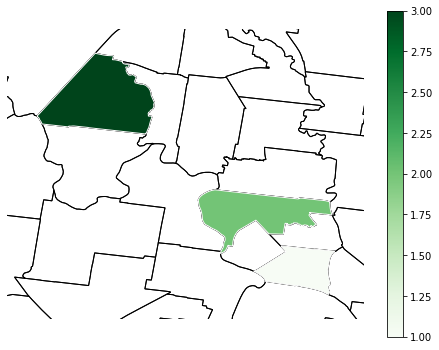

In [6]:
# Get the overall shape file, and make sure it only looks at valid areas of victoria
shape = gpd.read_file('../data/raw/ShapeFile/SA2_2021_AUST_GDA2020.shp')
shape = shape.loc[shape.STE_NAME21 == "Victoria"]
shape = shape.loc[shape.geometry != None]
ax = gplt.polyplot(shape)

# Add in heatmap values for the suburbs in the data
gplt.choropleth(
  geo_df,
  hue="values",
  edgecolor="white",
  linewidth=1,
  cmap="Greens",
  legend=True,
  #scheme="FisherJenks",
  #projection=gcrs.AlbersEqualArea(),
  ax=ax
)
# Include the below, if you don't want it to zoom in to only the selected suburbs
#minx, miny, maxx, maxy = shape.total_bounds
#ax.set_xlim(minx, maxx)
#ax.set_ylim(miny, maxy)